# Setting

In [58]:
datadir_new = './../../../data/dosue-j_20220304/'
#datadir_new = './../../../data/dosue-j_reference_20220303/'
datadir_old = './../../../data/dosue-j_reference_20220303/'
outdir = './output_first'
suffix_new = 'darkroom'
suffix_old = 'tandem'
filename_300new = f'{datadir_new}/220304_001_300K_3.csv' # 300K,ここを測定値に変える.
filename_77new = f'{datadir_new}/220304_001_77K_3.csv' # 77K,ここを測定値に変える.
filename_Alnew = f'{datadir_new}/220304_002_Al_1.csv' # Al,ここを測定値に変える.
filename_300old = f'{datadir_old}/220303_002_300Kz.csv' # 300K
filename_77old = f'{datadir_old}/220303_002_77K.csv' # 77K
filename_Alold = f'{datadir_old}/220302_006_300K_al_without_upperECO.csv' # 300K,ここを測定値に変える.

room_temp_new_deg = 25.4 # room temperature in the measurement,ここを測定値に変える.
room_temp_new = 273.15 + room_temp_new_deg
room_temp_old_deg = 15. # room temperature in the measurement, 仮の値
room_temp_old = 273.15 + room_temp_old_deg
k_B = 1.380649e-23  # boltzmann const. [J/K]
freq_min = 2 # [GHz]
freq_max = 18 # [GHz]

csvType = 'Keysight'; # Keysight Spectrum Analyzer: output
#csvType = 'Anritsu'; # Anritsu Spectrum analyzer: Waveform output
#csvType = 'TwoColumn'; # freq, dBm
#csvType = 'OneColumn'; # dBm 

# Check output directory
import os
if not os.path.isdir(outdir):
    print(f'Create a new directory for output files! --> {outdir}')
    os.mkdir(outdir)
    pass

# Import libraries

In [59]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname('.'), '..'))
from utils import *

# Get data

In [60]:
freq_300old, power_300old = read_csv(f'{filename_300old}', csvType)
freq_77old, power_77old = read_csv(f'{filename_77old}', csvType)
freq_Alold, power_Alold = read_csv(f'{filename_Alold}', csvType)
freq_300new, power_300new = read_csv(f'{filename_300new}', csvType)
freq_77new, power_77new = read_csv(f'{filename_77new}', csvType)
freq_Alnew, power_Alnew = read_csv(f'{filename_Alnew}', csvType)

# Select data between freq_min and freq_max
power_300old = power_300old[freq_300old<=freq_max]
freq_300old = freq_300old[freq_300old<=freq_max]
power_300old = power_300old[freq_300old>=freq_min]
freq_300old = freq_300old[freq_300old>=freq_min]

power_77old = power_77old[freq_77old<=freq_max]
freq_77old = freq_77old[freq_77old<=freq_max]
power_77old = power_77old[freq_77old>=freq_min]
freq_77old = freq_77old[freq_77old>=freq_min]

power_Alold = power_Alold[freq_Alold<=freq_max]
freq_Alold = freq_Alold[freq_Alold<=freq_max]
power_Alold = power_Alold[freq_Alold>=freq_min]
freq_Alold = freq_Alold[freq_Alold>=freq_min]

power_300new = power_300new[freq_300new<=freq_max]
freq_300new = freq_300new[freq_300new<=freq_max]
power_300new = power_300new[freq_300new>=freq_min]
freq_300new = freq_300new[freq_300new>=freq_min]

power_77new = power_77new[freq_77new<=freq_max]
freq_77new = freq_77new[freq_77new<=freq_max]
power_77new = power_77new[freq_77new>=freq_min]
freq_77new = freq_77new[freq_77new>=freq_min]

power_Alnew = power_Alnew[freq_Alnew<=freq_max]
freq_Alnew = freq_Alnew[freq_Alnew<=freq_max]
power_Alnew = power_Alnew[freq_Alnew>=freq_min]
freq_Alnew = freq_Alnew[freq_Alnew>=freq_min]

print(freq_300old)
print(power_300old)
print(freq_77old)
print(power_77old)
print(freq_Alold)
print(power_Alold)
print(freq_300new)
print(power_300new)
print(freq_77new)
print(power_77new)
print(freq_Alnew)
print(power_Alnew)

[ 2.00175   2.004399  2.007048 ... 17.993763 17.996412 17.999061]
[0.00190132 0.00197884 0.0022772  ... 0.00199206 0.00232733 0.00220787]
[ 2.00175   2.004399  2.007048 ... 17.993763 17.996412 17.999061]
[0.00200047 0.00181145 0.002295   ... 0.00154991 0.00142764 0.00123779]
[ 2.002048  2.004697  2.007346 ... 17.994061 17.99671  17.999359]
[1.38831786e-04 1.50689872e-04 1.37408579e-04 ... 1.03844701e-04
 1.09982271e-04 9.54106907e-05]
[ 2.00175   2.004399  2.007048 ... 17.993763 17.996412 17.999061]
[0.0021018  0.00195674 0.00197649 ... 0.00149813 0.00170111 0.00207979]
[ 2.00175   2.004399  2.007048 ... 17.993763 17.996412 17.999061]
[0.00188208 0.00206343 0.00208364 ... 0.00101379 0.00117267 0.00087602]
[ 2.00175   2.004399  2.007048 ... 17.993763 17.996412 17.999061]
[0.00057977 0.00057101 0.00068883 ... 0.00027323 0.00031256 0.00031332]


# Plot Power [dBm]

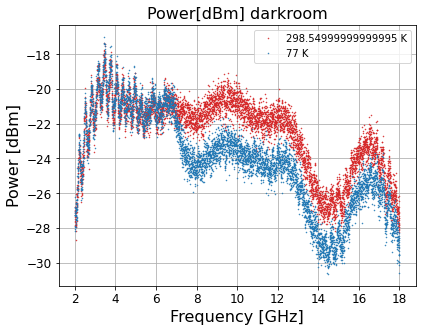

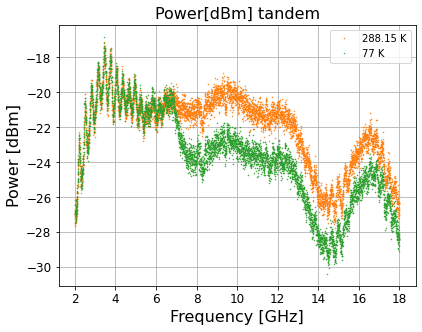

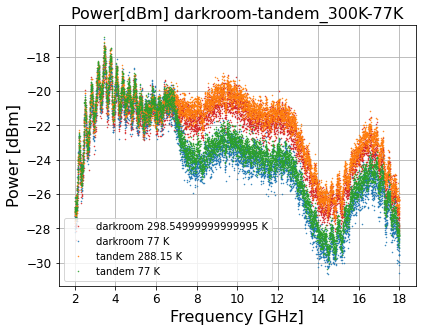

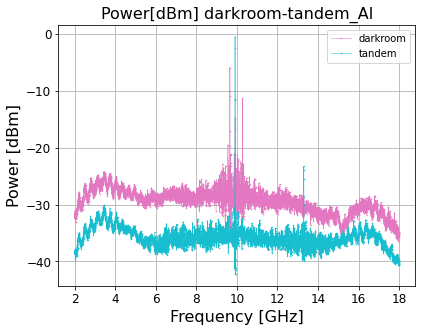

In [61]:
# Plot new
plot_power(True, [freq_300new, freq_77new], [power_300new, power_77new], [f'{room_temp_new} K', '77 K'], ['tab:red', 'tab:blue'], suffix_new, outdir)
# Plot old
plot_power(True, [freq_300old, freq_77old], [power_300old, power_77old], [f'{room_temp_old} K', '77 K'], ['tab:orange', 'tab:green'], suffix_old, outdir)
# Plot compare new v.s. old in 77K & 300K
plot_power(True, [freq_300new, freq_77new, freq_300old, freq_77old], [power_300new, power_77new, power_300old, power_77old], 
           [f'{suffix_new} {room_temp_new} K', f'{suffix_new} 77 K', f'{suffix_old} {room_temp_old} K', f'{suffix_old} 77 K'], ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'], f'{suffix_new}-{suffix_old}_300K-77K', outdir)
# Plot compare new v.s. old in Al
plot_power(True, [freq_Alnew, freq_Alold], [power_Alnew, power_Alold], [suffix_new, suffix_old], ['tab:pink', 'tab:cyan'], f'{suffix_new}-{suffix_old}_Al', outdir, linestyle='-')

# Plot Power [mW]

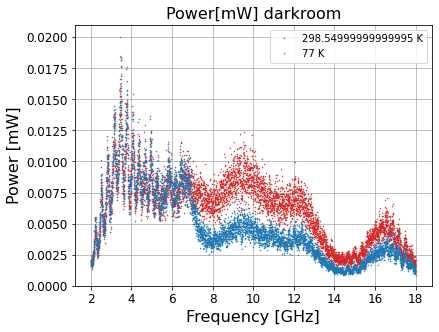

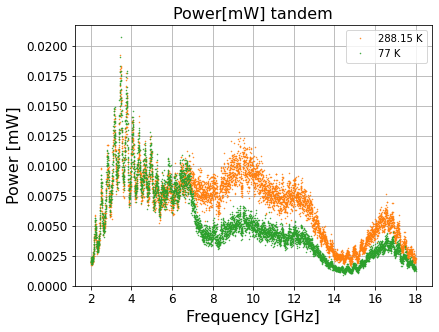

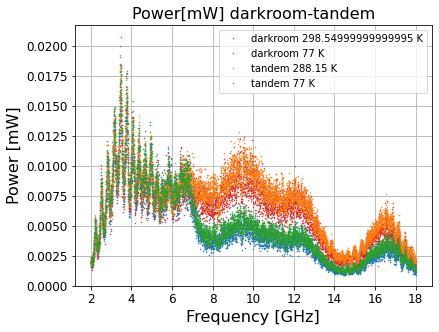

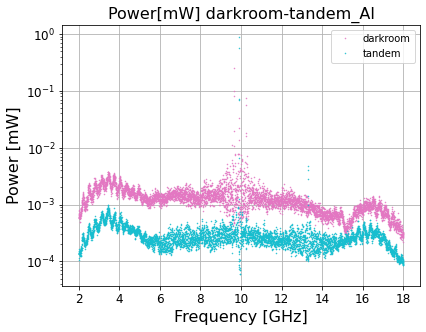

In [62]:
# Plot new
plot_power(False, [freq_300new, freq_77new], [power_300new, power_77new], [f'{room_temp_new} K', '77 K'], ['tab:red', 'tab:blue'], suffix_new, outdir)
plot_power(False, [freq_300new, freq_77new], [power_300new, power_77new], [f'{room_temp_new} K', '77 K'], ['tab:red', 'tab:blue'], f'{suffix_new}_logy', outdir, logy=True, show=False)
# Plot old
plot_power(False, [freq_300old, freq_77old], [power_300old, power_77old], [f'{room_temp_old} K', '77 K'], ['tab:orange', 'tab:green'], suffix_old, outdir)
plot_power(False, [freq_300old, freq_77old], [power_300old, power_77old], [f'{room_temp_old} K', '77 K'], ['tab:orange', 'tab:green'], f'{suffix_old}_logy', outdir, logy=True, show=False)
# Plot compare new v.s. old in 300K and 77K
plot_power(False, [freq_300new, freq_77new, freq_300old, freq_77old], [power_300new, power_77new, power_300old, power_77old], 
           [f'{suffix_new} {room_temp_new} K', f'{suffix_new} 77 K', f'{suffix_old} {room_temp_old} K', f'{suffix_old} 77 K'], ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'], f'{suffix_new}-{suffix_old}', outdir)
plot_power(False, [freq_300new, freq_77new, freq_300old, freq_77old], [power_300new, power_77new, power_300old, power_77old], 
           [f'{suffix_new} {room_temp_new} K', f'{suffix_new} 77 K', f'{suffix_old} {room_temp_old} K', f'{suffix_old} 77 K'], ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'], f'{suffix_new}-{suffix_old}_logy', outdir, logy=True, show=False)
# Plot compare new v.s. old in Al
plot_power(False, [freq_Alnew, freq_Alold], [power_Alnew, power_Alold], [suffix_new, suffix_old], ['tab:pink', 'tab:cyan'], f'{suffix_new}-{suffix_old}_Al', outdir, logy=True)

# Calculate gain & Trx (Y-factor claculation)

Y-factor calculation

もし、T の温度の暗室に測定系が存在したら、そこにある測定系が得られるパワーは(増幅はないものとして)

$$
P = k_B T B [W]
$$
- $k_B$: ボルツマン定数 [J/K]
- $T$ : 暗室の温度 [K]
- $B$ : バンド幅 = RBW (resolution band width) [Hz]


$T_{77}$ K と $T_{300}$ K の測定をした場合、
$$
\begin{align}
P_{300} &= G k_B (T_{rx} + T_{300}) \tag{1}\label{300} \\
P_{77}  &= G k_B (T_{rx} + T_{77}) \tag{2}\label{77}
\end{align}
$$
注) $G \propto B$ で $G$ に $B$ を含む
  
  
Y-factor は
$$ 
Y = \frac{P_{300}}{P_{77}} = \frac{T_{rx} + T_{300}}{T_{rx} + T_{77}} \\
\Leftrightarrow
T_{rx} = \frac{T_{300}-YT_{77}}{Y-1}  \tag{3}\label{Trx} \\
$$
また、(\ref{300}) - (\ref{77}) より
$$
\begin{align}
P_{300} - P_{77} &= G k_B (T_{300} - T_{77}) \\
\Leftrightarrow
G &= \frac{1}{k_B}\frac{P_{300}-P_{77}}{T_{300}-T_{77}}  \tag{4}\label{G}
\end{align}
$$ 

In [63]:
## Assume the same freq between 300K and 77K
if not np.all(freq_300new == freq_77new):
    print('Error! The frequency should be the same between 300K and 77K data files.')
    pass

freq = freq_300old
#Trx = power_300/(power_300-power_77) * (room_temp-77.) - room_temp
#gaink = (power_300-power_77)/(room_temp-77.) # Gain * k_B (boltzmann const.)
#gain = gaink / k_B

def Yfactor(power_300, power_77, T_300, T_77, err_power_300=None, err_power_77=None):
    Y = power_300/power_77
    Trx = (T_300-T_77)/(Y-1.)
    G = (power_300-power_77)/(T_300-T_77)/k_B
    err_Y = err_Trx = err_G = None
    if err_power_300 is not None and err_power_77 is not None:
        err_Y = np.sqrt( np.power(err_power_300/power_77, 2.) + np.power(Y/power_77*err_power_77,2.) )
        err_Trx = np.sqrt( np.power(Trx/(Y-1.)*err_Y, 2.) )
        err_G = np.sqrt( err_power_300**2. + err_power_77**2. )/(T_300-T_77)/k_B
        pass
    return [Trx, G],[err_Trx, err_G]

[Trx_new, G_new],[tmp,tmp] = Yfactor(power_300new, power_77new, room_temp_new, 77.)
[Trx_old, G_old],[tmp,tmp] = Yfactor(power_300old, power_77old, room_temp_old, 77.)

# Suppress negative value of G for logy
G_new[G_new<=0.] = 1.e-100
G_old[G_old<=0.] = 1.e-100

In [64]:
# Print Trx, G
print(f'Trx_old = {Trx_old}')
print(f'Gain_old = {G_old}')

print(f'Trx_new = {Trx_new}')
print(f'Gain_new = {G_new}')

Trx_old = [ -4260.36427592   2285.03953361 -27223.34162681 ...    740.17461389
    335.05771147    269.42003833]
Gain_old = [1.00000000e-100 5.74182519e+016 1.00000000e-100 ... 1.51666436e+017
 3.08614228e+017 3.32762118e+017]
Trx_new = [ 1897.73191153 -4284.90641954 -4308.03643653 ...   463.74490903
   491.64491483   161.22861787]
Gain_new = [7.18323475e+016 1.00000000e-100 1.00000000e-100 ... 1.58338856e+017
 1.72759266e+017 3.93539010e+017]


# Plot Trx

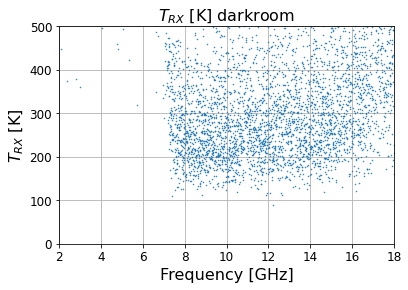

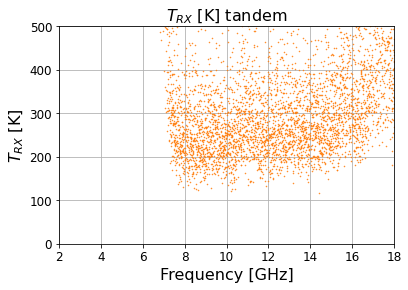

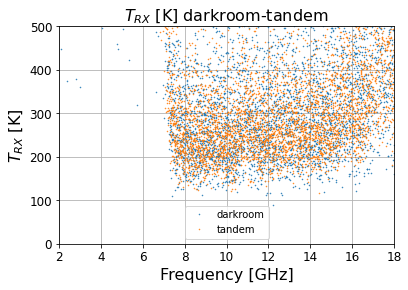

In [65]:
def TrxPlot(
    freq_list, Trx_list, label_list, color_list, suffix,
    Trx_err_list=None,
    xmin=None, xmax=None, ymin=None, ymax=None
    ):
    
    if Trx_err_list is not None:
        # With error bar
        for freq, Trx, Trx_err, label, color in zip(freq_list, Trx_list, Trx_err_list, label_list, color_list):
            plt.errorbar(
                freq, Trx, yerr=Trx_err, label=label, 
                color=color, marker='o', markersize=0.5, linestyle='', linewidth=1.0, 
                ecolor=color, capsize=3, fmt='o')
    else:
        # Without error bar
        for freq, Trx, label, color in zip(freq_list, Trx_list, label_list, color_list):
            plt.plot(freq, Trx, label=label, color=color, marker='o', markersize=0.5, linestyle='')
            pass
        pass
    plt.title('$T_{RX}$ [K] '+suffix, fontsize=16)
    plt.xlabel('Frequency [GHz]', fontsize=16) #x軸の名前
    plt.ylabel('$T_{RX}$ [K]', fontsize=16) #y軸の名前
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    plt.ylim(0,500) #y軸範囲指定
    if xmin is not None: plt.xlim(left=xmin)
    if xmax is not None: plt.xlim(right=xmax)
    if ymin is not None: plt.ylim(left=ymin)
    if ymax is not None: plt.ylim(right=ymax)
    if len(freq_list)>1:
        plt.legend()
        pass
    plt.savefig(f'{outdir}/Trx_{suffix}.png')
    plt.show()
    plt.close()

# Plot New Trx
TrxPlot([freq], [Trx_new], [suffix_new], ['tab:blue'], suffix_new)
# Plot Old Trx
TrxPlot([freq], [Trx_old], [suffix_old], ['tab:orange'], suffix_old)
# Plot Compare Trx
TrxPlot([freq, freq], [Trx_new, Trx_old], [suffix_new, suffix_old], ['tab:blue', 'tab:orange'], f'{suffix_new}-{suffix_old}')

# Plot Gain

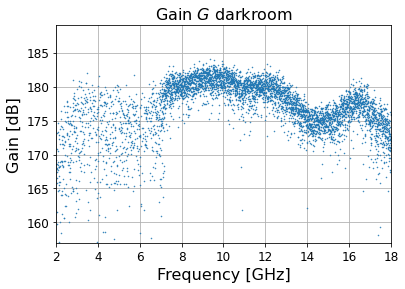

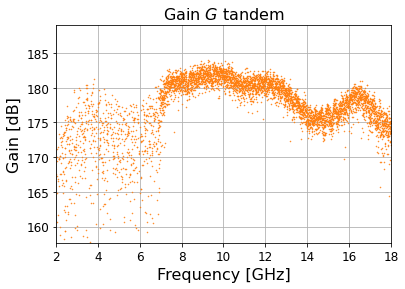

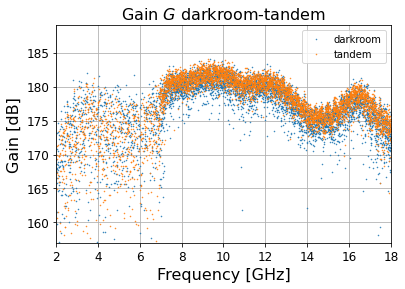

In [66]:
def GainPlot(
    freq_list, G_list, label_list, color_list, suffix,
    G_err_list=None,
    markersize=0.5, linestyle='', linewidth=0.3,
    xmin=None, xmax=None, ymin=None, ymax=None
    ):
    G_dB_list = [ to_dB(G) for G in G_list ]
    
    if G_err_list is not None:
        # Convert G_err to dB
        new_G_dB_err_list = []
        for G, err in zip(G_list, G_err_list):
            nom = G
            up = G + err
            down = G - err
            nom[nom<=0] = 1e-100
            up[up<=0] = 1e-100
            down[down<=0] = 1e-100
            nom  = mW2dBm(nom)
            up   = mW2dBm(up)
            down = mW2dBm(down)
            up_err = up - nom
            down_err = nom - down
            new_G_dB_err_list.append([up_err,down_err])
            pass
        G_dB_err_list = new_G_dB_err_list
        # With error bar
        for freq, G, G_err, label, color in zip(freq_list, G_dB_list, G_dB_err_list, label_list, color_list):
            plt.errorbar(
                freq, G, yerr=G_err, label=label, 
                color=color, marker='o', markersize=markersize, linestyle=linestyle, linewidth=linewidth, 
                ecolor=color, capsize=3, fmt='o')
    else:
        # Without error bar
        for freq, G_dB, label, color in zip(freq_list, G_dB_list, label_list, color_list):
            plt.plot(freq, G_dB, label=label, color=color, marker='o', markersize=markersize, linestyle=linestyle, linewidth=linewidth)
            pass
    plt.title('Gain $G$ '+suffix, fontsize=16)
    plt.xlabel('Frequency [GHz]', fontsize=16) #x軸の名前
    plt.ylabel('Gain [dB]', fontsize=16) #y軸の名前
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    plt.ylim(np.mean(G_dB_list[0][G_dB_list[0]>0.])-20,max(G_dB_list[0])+5) #y軸範囲指定
    if xmin is not None: plt.xlim(left=xmin)
    if xmax is not None: plt.xlim(right=xmax)
    if ymin is not None: plt.ylim(left=ymin)
    if ymax is not None: plt.ylim(right=ymax)
    if len(freq_list)>1:
        plt.legend()
        pass

    plt.savefig(f'{outdir}/Gain_{suffix}.png')
    plt.show()
    plt.close()

# Plot Gain new
GainPlot([freq], [G_new], [suffix_new], ['tab:blue'], suffix_new)
# Plot Gain old
GainPlot([freq], [G_old], [suffix_old], ['tab:orange'], suffix_old)
# Plot Gain compare
GainPlot([freq, freq], [G_new, G_old], [suffix_new, suffix_old], ['tab:blue', 'tab:orange'], f'{suffix_new}-{suffix_old}')

# Get Averaged Data

In [67]:
n_average = 100
freq_ave, tmp = freq_average(freq, n_average=n_average)
# Get Averaged New Data
power_300new_ave, power_300new_ave_err = freq_average(power_300new, n_average=n_average)
power_77new_ave, power_77new_ave_err = freq_average(power_77new, n_average=n_average)
power_Alnew_ave, power_Alnew_ave_err = freq_average(power_Alnew, n_average=n_average)
# Get Averaged Old Data
power_300old_ave, power_300old_ave_err = freq_average(power_300old, n_average=n_average)
power_77old_ave, power_77old_ave_err = freq_average(power_77old, n_average=n_average)
power_Alold_ave, power_Alold_ave_err = freq_average(power_Alold, n_average=n_average)

# Plot Averaged Power [mW]

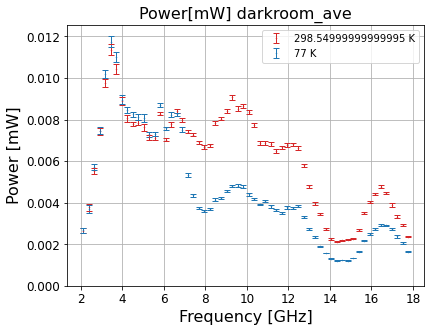

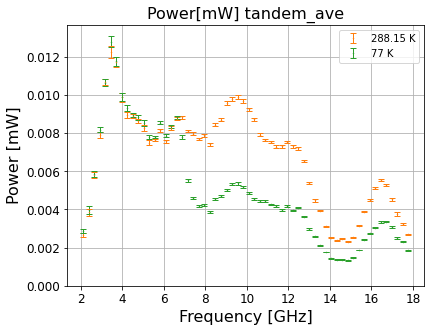

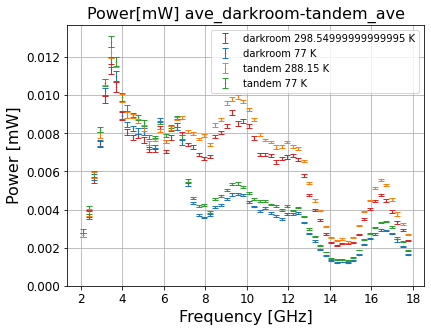

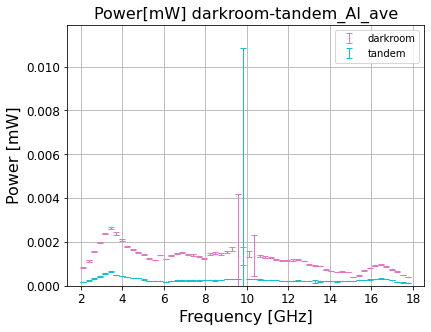

In [68]:
# Plot new
plot_power(False, [freq_ave, freq_ave], [power_300new_ave, power_77new_ave], [f'{room_temp_new} K', '77 K'], ['tab:red', 'tab:blue'], 
           power_err_list=[power_300new_ave_err, power_77new_ave_err], suffix=suffix_new+'_ave', outdir=outdir, linewidth=1)
plot_power(False, [freq_ave, freq_ave], [power_300new_ave, power_77new_ave], [f'{room_temp_new} K', '77 K'], ['tab:red', 'tab:blue'], 
           power_err_list=[power_300new_ave_err, power_77new_ave_err], suffix=f'{suffix_new}_logy'+'_ave', outdir=outdir, logy=True, show=False, linewidth=1)
# Plot old
plot_power(False, [freq_ave, freq_ave], [power_300old_ave, power_77old_ave], [f'{room_temp_old} K', '77 K'], ['tab:orange', 'tab:green'], 
           power_err_list=[power_300old_ave_err, power_77old_ave_err], suffix=suffix_old+'_ave', outdir=outdir, linewidth=1)
plot_power(False, [freq_ave, freq_ave], [power_300old_ave, power_77old_ave], [f'{room_temp_old} K', '77 K'], ['tab:orange', 'tab:green'], 
           power_err_list=[power_300old_ave_err, power_77old_ave_err], suffix=f'{suffix_old}_logy'+'_ave', outdir=outdir, logy=True, show=False, linewidth=1)
# Plot compare
plot_power(False, [freq_ave, freq_ave, freq_ave, freq_ave], [power_300new_ave, power_77new_ave, power_300old_ave, power_77old_ave], 
           [f'{suffix_new} {room_temp_new} K', f'{suffix_new} 77 K', f'{suffix_old} {room_temp_old} K', f'{suffix_old} 77 K'], 
           ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'], 
           power_err_list = [power_300new_ave_err, power_77new_ave_err, power_300old_ave_err, power_77old_ave_err], 
           suffix=f'ave_{suffix_new}-{suffix_old}'+'_ave', outdir=outdir, linewidth=1)
plot_power(False, [freq_ave, freq_ave, freq_ave, freq_ave], [power_300new_ave, power_77new_ave, power_300old_ave, power_77old_ave], 
           [f'{suffix_new} {room_temp_new} K', f'{suffix_new} 77 K', f'{suffix_old} {room_temp_old} K', f'{suffix_old} 77 K'], 
           ['tab:red', 'tab:blue', 'tab:orange', 'tab:green'], 
           power_err_list = [power_300new_ave_err, power_77new_ave_err, power_300old_ave_err, power_77old_ave_err], 
           suffix=f'ave_{suffix_new}-{suffix_old}_logy'+'_ave', outdir=outdir, logy=True, show=False, linewidth=1)
# Plot compare new v.s. old in Al
plot_power(False, [freq_ave, freq_ave], [power_Alnew_ave, power_Alold_ave], [suffix_new, suffix_old], ['tab:pink', 'tab:cyan'], 
           f'{suffix_new}-{suffix_old}_Al'+'_ave', outdir, 
           power_err_list = [power_Alnew_ave_err, power_Alold_ave_err], 
           linewidth=1)

# Calculate Averaged $T_{\mathrm{rx}}$

In [69]:
# New
[Trx_new_ave, G_new_ave],[Trx_new_ave_err,G_new_ave_err] = Yfactor(power_300new_ave, power_77new_ave, room_temp_new, 77.,power_300new_ave_err, power_77new_ave_err)
# Old
[Trx_old_ave, G_old_ave],[Trx_old_ave_err,G_old_ave_err] = Yfactor(power_300old_ave, power_77old_ave, room_temp_old, 77.,power_300old_ave_err, power_77old_ave_err)

# Suppress negative value of G for logy
G_new_ave[G_new_ave<=0.] = 1.e-100
G_old_ave[G_old_ave<=0.] = 1.e-100
G_new_ave_err[G_new_ave_err<=0.] = 1.e-100
G_old_ave_err[G_old_ave_err<=0.] = 1.e-100

# Plot Averaged Gain $G$

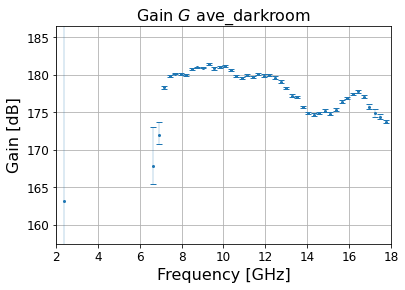

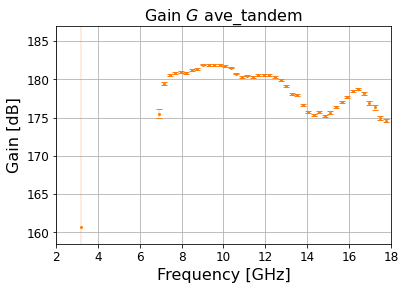

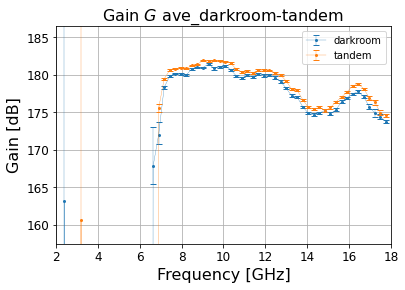

In [70]:
# Plot Gain new
GainPlot([freq_ave], [G_new_ave], [suffix_new], ['tab:blue'], 'ave_'+suffix_new, 
         G_err_list = [G_new_ave_err],
         markersize=2)
# Plot Gain old
GainPlot([freq_ave], [G_old_ave], [suffix_old], ['tab:orange'], 'ave_'+suffix_old,
         G_err_list = [G_new_ave_err],
         markersize=2)
# Plot Gain compare
GainPlot([freq_ave, freq_ave], [G_new_ave, G_old_ave], [suffix_new, suffix_old], ['tab:blue', 'tab:orange'], 
         f'ave_{suffix_new}-{suffix_old}',  G_err_list = [G_new_ave_err, G_old_ave_err],
         markersize=2, linestyle='-')

# Plot Averaged $T_{\mathrm{rx}}$

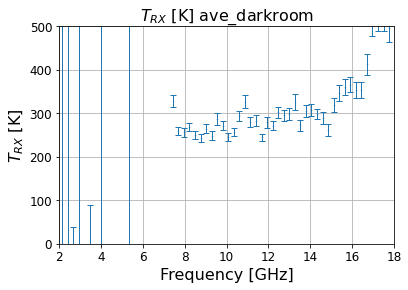

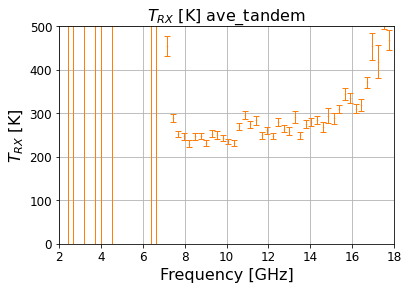

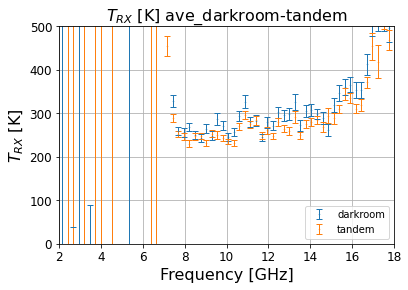

In [71]:
# Plot New Trx
TrxPlot([freq_ave], [Trx_new_ave], [suffix_new], ['tab:blue'], f'ave_{suffix_new}', Trx_err_list=[Trx_new_ave_err])
# Plot Old Trx
TrxPlot([freq_ave], [Trx_old_ave], [suffix_old], ['tab:orange'], f'ave_{suffix_old}', Trx_err_list=[Trx_old_ave_err])
# Plot Compare Trx
TrxPlot([freq_ave, freq_ave], [Trx_new_ave, Trx_old_ave], [suffix_new, suffix_old], ['tab:blue', 'tab:orange'], f'ave_{suffix_new}-{suffix_old}', Trx_err_list=[Trx_new_ave_err, Trx_old_ave_err])

# Calculate & plot NEP [W/$\sqrt{Hz}$]

In [72]:
dnu = 10.e+3 # Width of the signal peak (10GHz * 1e-6 = 10kHz) [Hz]
Tload = 300 # Tload is supposed to be 300K.

### NEP calculation

$$
\begin{align}
 T_{noise} &= T_{RX} + T_{load} \tag{5}\label{a} \\
 P_{noise} &= k_B T_{noise} \Delta \nu \tag{6}\label{b}
\end{align}
$$

<br>
<br>
$$
\begin{align}
 NEP &= \sqrt{2 P_{noise} k_B T_{noise}} \\
\mathrm{(\ref{b}) より}  &  \\
     &= \sqrt{2\Delta\nu} k_B T_{noise} \\
     &= \sqrt{2\Delta\nu} k_B (T_{rx}+T_{load}) \\
\end{align}
$$
注) $\sqrt{2}$ は $NEP$ が 0.5 sec の時間積分でのノイズを表しているため。

In [73]:
NEP_old_ave = np.sqrt(2.*dnu) * k_B * (Trx_old_ave + Tload)
NEP_old_ave_err = np.sqrt(2.*dnu) * k_B * Trx_old_ave_err

NEP_new_ave = np.sqrt(2.*dnu) * k_B * (Trx_new_ave + Tload)
NEP_new_ave_err = np.sqrt(2.*dnu) * k_B * Trx_new_ave_err

NEP_500 = np.sqrt(2.*dnu) * k_B * (500 + Tload)
print(NEP_500)

1.5620260325414811e-18


# NEPplot

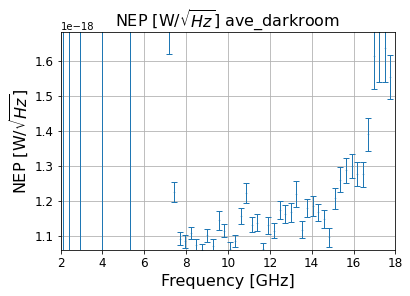

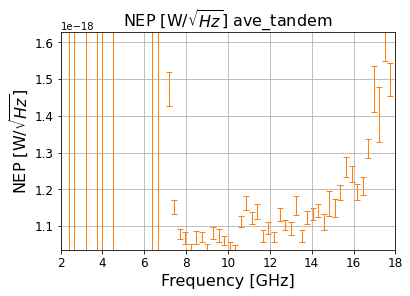

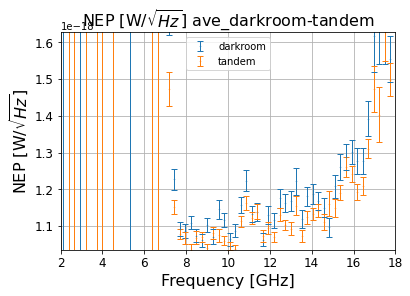

In [74]:
def NEPPlot(
    freq_list, NEP_list, label_list, color_list, suffix,
    NEP_err_list=None,
    xmin=None, xmax=None, ymin=None, ymax=None
    ):
    
    if NEP_err_list is not None:
        # With error bar
        for freq, NEP, NEP_err, label, color in zip(freq_list, NEP_list, NEP_err_list, label_list, color_list):
            plt.errorbar(
                freq, NEP, yerr=NEP_err, label=label, 
                color=color, marker='o', markersize=0.5, linestyle='', linewidth=1.0, 
                ecolor=color, capsize=3, fmt='o')
    else:
        # Without error bar
        for freq, NEP, label, color in zip(freq_list, NEP_list, label_list, color_list):
            plt.plot(freq, NEP, label=label, color=color, marker='o', markersize=0.5, linestyle='')
            pass
        pass
    plt.title('NEP [W/$\sqrt{Hz}$] '+suffix, fontsize=16)
    plt.xlabel('Frequency [GHz]', fontsize=16) #x軸の名前
    plt.ylabel('NEP [W/$\sqrt{Hz}$]', fontsize=16) #y軸の名前
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.xlim(freq_min,freq_max) #x軸範囲指定
    check_range = (freq > 8.) & (freq < 18.)
    plt.ylim(np.min(NEP[check_range]), np.max(NEP[check_range])) #x軸範囲指定
    if xmin is not None: plt.xlim(left=xmin)
    if xmax is not None: plt.xlim(right=xmax)
    if ymin is not None: plt.ylim(left=ymin)
    if ymax is not None: plt.ylim(right=ymax)
    if len(freq_list)>1:
        plt.legend()
        pass
    plt.savefig(f'{outdir}/NEP_{suffix}.png')
    plt.show()
    plt.close()

# Plot New NEP
NEPPlot([freq_ave], [NEP_new_ave], [suffix_new], ['tab:blue'], f'ave_{suffix_new}', NEP_err_list=[NEP_new_ave_err])
# Plot Old NEP
NEPPlot([freq_ave], [NEP_old_ave], [suffix_old], ['tab:orange'], f'ave_{suffix_old}', NEP_err_list=[NEP_old_ave_err])
# Plot Compare NEP
NEPPlot([freq_ave, freq_ave], [NEP_new_ave, NEP_old_ave], [suffix_new, suffix_old], ['tab:blue', 'tab:orange'], f'ave_{suffix_new}-{suffix_old}', NEP_err_list=[NEP_new_ave_err, NEP_old_ave_err])

In [75]:
#NEP = 2.7e-17 #W/√Hz
NEP = 1.05e-18 #W/√Hz
#t = 3600 * 2 #sec
t = 120 #sec
A_eff = 57 #cm^2
A_effm = A_eff * 1e-4
chi = 4.5e-14 * np.sqrt(NEP/np.sqrt(t) * 1e23 / A_effm)
print(chi)

5.835450963735081e-11


In [76]:
t_total = t *10 / 2.5e-3
t_totalday = t_total / 3600 / 24
print(t_totalday)

5.555555555555556


### far field condition(アンテナ金属板間)

far field condition になるために必要な距離 $d_{F}$ [mm] は
$$
d_{F} =  \frac{2D^2}{\lambda} \\
$$

- $D$: アンテナの直径 [mm]
- $\lambda$: 波長 [mm]


In [77]:
(2 *91.9 *91.9) / 16.65 #16.65mmは18GHzの波長

1014.4876876876879